# Plotting Astronomical Images Without Coordinates
Sometimes you just need to plot an astronomical image, probably a FITS image or array, and you dont care about the coordinates showing up on the axes. Simulators wont have real world coordinates in their image cubes, and observers might want a quick look, or a smaller reference image, and fiddling with coordinate axes might be a pain. 

This example will use a FITS image to plot a simple image, add a colour bar, and show some other useful things. It will use only two packages: ``astropy`` and ``matplotlib``. For those without FITS images, a simple numpy array can be substituted. If you are not familiar with FITS images and the ``astropy`` input/output ``fits`` module, then go ahead and look at the [Opening and Exploring FITS Files](..\WorkingWithFitsFiles\Opening%20and%20Exploring%20FITS%20Files.ipynb) example. 

## The preliminary stuff - importing the packages and loading in the image
First we are going to import the two packages and load in the image from a FITS file. All we really care about right now is the FITS data, so we wont worry too much about the header part of the FITS file.

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
path_to_fits = './Data/ExampleFITS.fits'

imageData = fits.getdata(path_to_fits)

## Now plot the image! Its that simple!

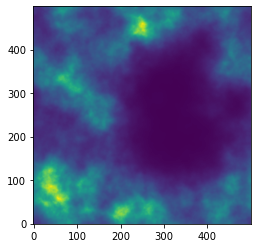

In [3]:
plt.imshow(imageData, origin = 'lower')

There we go, a simple image showing the data. It really is that easy. And that is fine for a quick look. But what if you want to put this in a document? Well, we should do this in a more robust way. 

## Plotting the image "properly"
### 1. Defining a Figure
If you just do the above steps, all sorts of unintended things can happen, especially if you then try to plot things over the top of the image. It is always better to define a figure object, then some axes, then your image. It makes everything so much easier. 

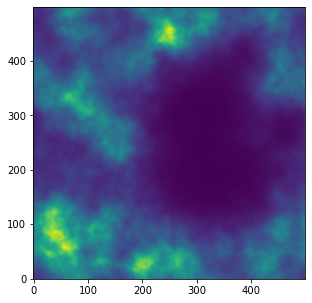

In [23]:
fig = plt.figure(figsize = (5,5)) # defining a figure size helps to keep figures consistant when they are saved later. 
ax = fig.add_subplot() # this creates a set of axes in your figure. Notice we call the fig object here, instead of plt.
img = ax.imshow(imageData, origin = 'lower') # as before, now we are calling ax instead of plt. Callable objects let you change things later

# you can also specify vmin and vmax keywords in the imshow call to limit the maximum and minimum value shown.

You can see this image looks nearly the same (just a little bigger) than the simple one before. But now everything is saved to callable object variables, which makes editing the image very easy.

### 2. Removing the axis tick labels
As we dont care about coordinates, and our coordinates are useless anyway, why not remove them? Because we made a callable set of objects earlier, this is easy to achieve. 

**A quick note! Just because this is jupyter notebooks, I have to call the whole image again. You will not have to do this in something like spyder, and can just update the old plot in place.**

[]

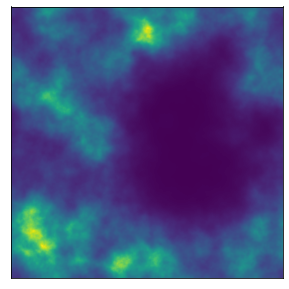

In [14]:
fig = plt.figure(figsize = (5,5)) 
ax = fig.add_subplot()
img = ax.imshow(imageData, origin = 'lower')

ax.axes.get_xaxis().set_ticks([]) # this simply replaces the tick labels with an empty array
ax.axes.get_yaxis().set_ticks([])

### 3. Add a colour bar
The image is looking pretty good, but how do we know what the colour represents? We add a colour bar and label it with something. I would suggest quickly seeing what units the image is in, and for that we need to quickly check the FITS header ``BUNIT`` keyword.

In [15]:
print(fits.getheader(path_to_fits)['BUNIT'])

MJy/sr


Ok, so we know what units its in, lets now create a colourbar and label it. **Again, I am repeating all the code just because of how jupyter notebooks works. In Spyder, with popout images, you will not need to redo all this.**

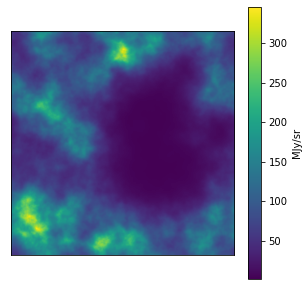

In [18]:
fig = plt.figure(figsize = (5,5)) 
ax = fig.add_subplot()
img = ax.imshow(imageData, origin = 'lower')

ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])

cbar = fig.colorbar(img) # note the spelling of color! matplotlib, and all python packages, use American English spelling!
cbar.set_label('MJy/sr') # set the label name

Dont worry too much that the colour bar is a weird size. You can play around with ``figsize`` to fix that, and for more adavanced plotting techniques, you want to be using ``gridspec`` for setting up your axes anyway (there will be an example on ``gridspec`` soon). 

All that is left to do is to save the image out somewhere. 

### 4. Save the image

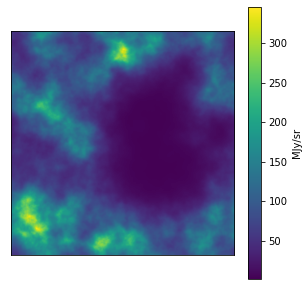

In [19]:
fig = plt.figure(figsize = (5,5)) 
ax = fig.add_subplot()
img = ax.imshow(imageData, origin = 'lower')

ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])

cbar = fig.colorbar(img)
cbar.set_label('MJy/sr')

fig.savefig('ExampleImage.png', dpi = 150, bbox_inches = 'tight') # always try to save images as .png files. Its better
# dpi sets the saved image resolution - 150 should be all you need
# bbox_inches with the 'tight' keyword will trim white edges off your plot but keep preserve of the text and images

### (Optional) 5. Plotting the image on a Log scale!
Astronomical images often have lots of low values, and then a few very high values. Plotting that all on a linear scale sometimes doesn't work. So most images get plotted on a log scale. 

We can do this easily, but we need to load in one more package first.

In [22]:
from matplotlib.colors import LogNorm

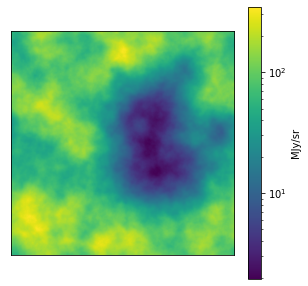

In [24]:
fig = plt.figure(figsize = (5,5)) 
ax = fig.add_subplot()
img = ax.imshow(imageData, origin = 'lower', norm = LogNorm())

ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])

cbar = fig.colorbar(img)
cbar.set_label('MJy/sr')